In [1]:
import numpy as np
from PIL import Image
import cv2 as cv
import json
import matplotlib.pyplot as plt

from tesseract import TESSERACT
from single_line_model import SingleLineModel
from standart_model import StandartModel
from metrics import edit_distance

### Taking true labels

In [2]:
with open(f'../../SingleLineImages/Test/ClearImages/clear_images_data.json') as json_file:
    single_line_DATA = json.load(json_file)

with open(f'../../StandartImages/Test/CrearImages/clear_images_data.json') as json_file:
    standart_DATA = json.load(json_file)


def take_clear_image_text(DATA, clear_image_name):
    res = ''
    clear_image_data = DATA[clear_image_name]

    for word_data in clear_image_data:
        word = str(word_data['word'])
        if word.find('\n') == -1:
            res += word + ' '
        else:
            res += word
    res = res[:-1]
    res += '\f'
    return res

### Loading lodels

In [3]:
model1 = TESSERACT(r'C:\Program Files\Tesseract-OCR\tesseract.exe')
model1.load()

model2 = SingleLineModel()
model2.load()

model3 = StandartModel()
model3.load()

### SingleLineModel

In [4]:
single_line_image1 = cv.imread('../sample_images/single_line_degraded_image0.png')
single_line_image2 = cv.imread('../sample_images/single_line_degraded_image1.png')
single_line_images = [single_line_image1, single_line_image2]

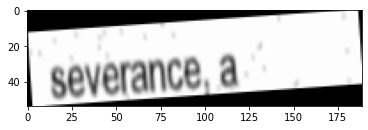

In [5]:
plt.imshow(single_line_image1, cmap='gray')
plt.show()

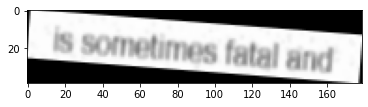

In [6]:
plt.imshow(single_line_image2, cmap='gray')
plt.show()

In [7]:
for text in model1.recognize_text(single_line_images):
    print(f'Prediction: {text}')

Prediction: severance, a

Prediction: 


In [8]:
for text in model2.recognize_text(single_line_images):
    print(f'Prediction: {text}')

Prediction: severance, a
Prediction: is sometimes fatal and


### Testing on the whole test Dataset

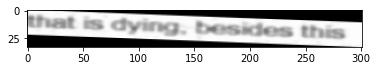

Prediction: that is dying, besides this
Relative mistake: 0.0


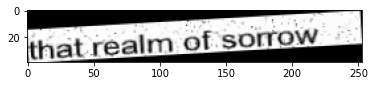

Prediction: that realm of sorrow
Relative mistake: 0.0


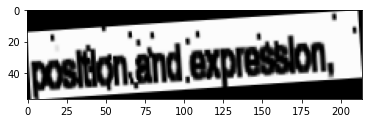

Prediction: positbion, and expression.
Relative mistake: 0.12


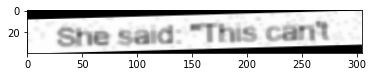

Prediction: She said. "This can't
Relative mistake: 0.045454545454545456


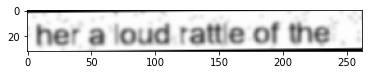

Prediction: her a loud rattle of the
Relative mistake: 0.0


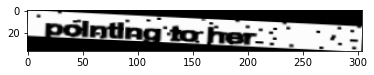

Prediction: polinting to her.
Relative mistake: 0.125


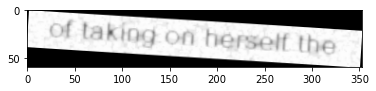

Prediction: of taking on herself the
Relative mistake: 0.0


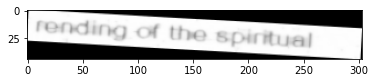

Prediction: rending of the spintual
Relative mistake: 0.08


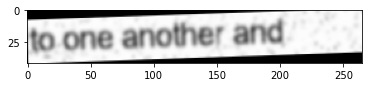

Prediction: to one another and
Relative mistake: 0.0


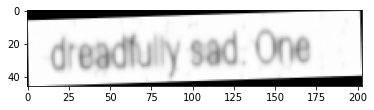

Prediction: dreadfully sad. One
Relative mistake: 0.0
---------------------------------------------------------------
SingleLineModel mean relative mistake: 0.051305921508347514


In [9]:
test_images = []
for i in range(1000):
    path = f'../../SingleLineImages/Test/DegradedImages/degraded_image{i}.png'
    test_images.append(cv.imread(path))

mean_relative_mistake = 0
i = 0
for pred_text in model2.recognize_text(test_images):
    true_text = take_clear_image_text(single_line_DATA, f'clear_image{i}.png')

    relative_mistake = int(edit_distance(pred_text, true_text)) / len(true_text)
    # relative_mistake = min(1., relative_mistake)
    
    if i % 100 == 0:
        plt.imshow(test_images[i], cmap='gray')
        plt.show()
        print(f'Prediction: {pred_text}')
        print(f'Relative mistake: {relative_mistake}')
    
    mean_relative_mistake += relative_mistake
    i += 1

mean_relative_mistake /= len(test_images)
print('---------------------------------------------------------------')
print(f'SingleLineModel mean relative mistake: {mean_relative_mistake}')

### StandartModel

In [12]:
standart_image1 = cv.imread('../sample_images/degraded_image0.png')
standart_image2 = cv.imread('../sample_images/degraded_image1.png')
standart_images = [standart_image1, standart_image2]

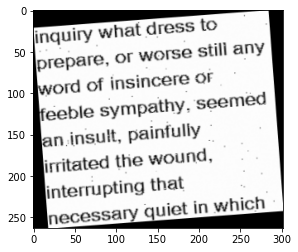

In [13]:
plt.imshow(standart_image1, cmap='gray')
plt.show()

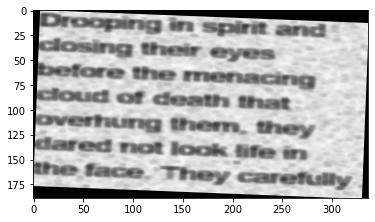

In [14]:
plt.imshow(standart_image2, cmap='gray')
plt.show()

In [15]:
for text in model1.recognize_text(standart_images):
    print(f'Prediction: {text}')

Prediction: inquiry what dress to
prepare, OF worse still any
ord of insincere OF
ceble sympathy. seemed
n.insult, painfully
irritated the wound,

interrupting that

nec ary quiet in which

Prediction: 


In [16]:
for text in model3.recognize_text(standart_images):
    print(f'Prediction: {text}')

Prediction: inquiry what dress to
prepare, or worse still any
word of insincere or
feeble sympathy, seemed
an insult, painfully
irritated the wound,
interrupting that
necessary quief in which
Prediction: Drooping in spirit and
closing their eyes
before the menacing
cloud of death that
overhung them, they
dared not look life in
the face. They careflly


### Testing on the whole Dataset

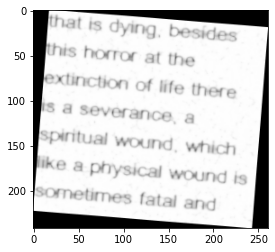

Prediction: that is dying, besides
this horror at the
extinction of life there
is a severance, a
spiritual wound, which
like a pnysical wound is
sometimes fatal and
Relative mistake: 0.006535947712418301


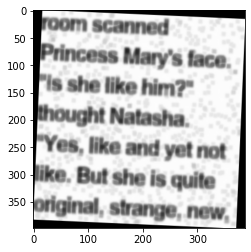

Prediction: room scanned
Princess Mary's ace.
"Is she like him?"
thought Natasha.
"Yes, like and yet not
like. But she is quite
original, strange, new
Relative mistake: 0.014184397163120567


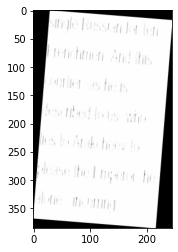

Prediction: single Russian for ten
Frenchmen. And this
coumtier, as he is
described foces, who
lies to Arakcheev to
please the Emperor, he
alone - incurring
Relative mistake: 0.027586206896551724


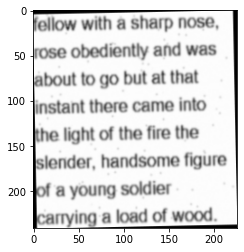

Prediction: fellow with a sharp nose,
rose obediently and was
about to go but at that
instant there came into
the light of the fire the
slender, handsome figure
of a young soldier
carrvying a load of wood.
Relative mistake: 0.0051813471502590676


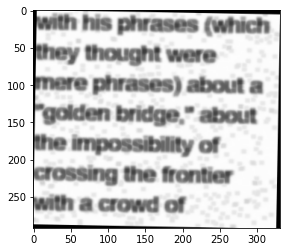

Prediction: with his phrases (which
they thought were
mere phrases) about a
"golden bridge," about
the impossibility of
crossing the frontier
with a crowd of
Relative mistake: 0.0


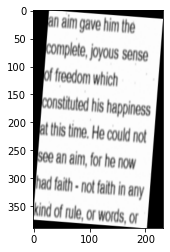

Prediction: an aim gave him the
complete, joyous sense
of freedom which
constituted his happiness
at this time. He could not
see an aim, for he now
had faith - not faith in any
kind of rule, or words, or
Relative mistake: 0.0


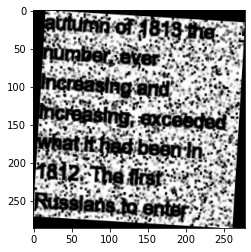

Prediction: autump of. "o A the
liw?. "h, As
number, ever
increasing and
increasing, excecded
what if had been in
18 12. The first
Kussians lo enter
Relative mistake: 0.19672131147540983


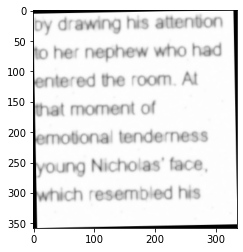

Prediction: by drawing his attention
to her nephew who had
entered the room. At
that moment of
emotional tenderness
young Nicholas" face,
which resembled his
Relative mistake: 0.00684931506849315


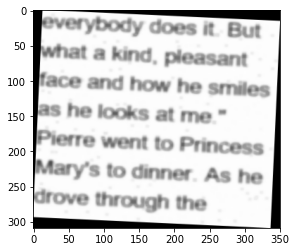

Prediction: everybody does it. But
what a kind, pleasant
face and how he smiles
as he looks at me."
Pierre went to Princess
Mary's to dinner. As he
drove through the
Relative mistake: 0.0


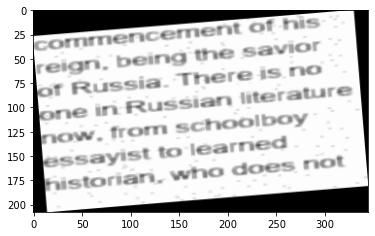

Prediction: commencement of is
reign, being the savior
of Russia. There is no
one in Russian literature
now, from schoolboy
essayist to learned
historian, who does not
Relative mistake: 0.006369426751592357
-------------------------------------------------------------
StandartModel mean relative mistake: 0.019783242272060728


In [10]:
test_images = []
for i in range(1000):
    path = f'../../StandartImages/Test/DegradedImages/degraded_image{i}.png'
    test_images.append(cv.imread(path))

mean_relative_mistake = 0
i = 0
for pred_text in model3.recognize_text(test_images):
    true_text = take_clear_image_text(standart_DATA, f'clear_image{i}.png')

    relative_mistake = int(edit_distance(pred_text, true_text)) / len(true_text)
    # relative_mistake = min(1., relative_mistake)

    if i % 100 == 0:
        plt.imshow(test_images[i], cmap='gray')
        plt.show()
        print(f'Prediction: {pred_text}')
        print(f'Relative mistake: {relative_mistake}')

    mean_relative_mistake += relative_mistake
    i += 1

mean_relative_mistake /= len(test_images)
print('-------------------------------------------------------------')
print(f'StandartModel mean relative mistake: {mean_relative_mistake}')